In [78]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import mrcnn.model as modellib
import mrcnn.visualize as visualize

In [63]:
class FacesConfig(config.Config):
    NAME = "Faces"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 81

In [64]:
model = modellib.MaskRCNN(mode='inference',
                             config=FacesConfig(),
                             model_dir=os.getcwd())

In [65]:
model.load_weights(filepath='mask_rcnn_coco.h5',
                   by_name=True)

In [72]:
image = cv2.imread('images/image_1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [75]:
r = model.detect(images=[image],
                 verbose=0)

In [76]:
r=r[0]

In [77]:
print(r.keys())

dict_keys(['rois', 'class_ids', 'scores', 'masks'])


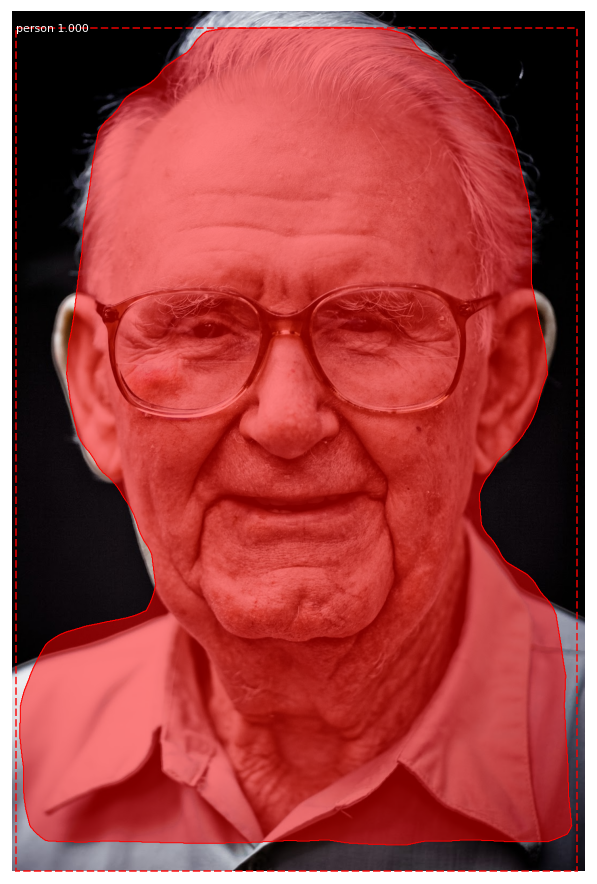

In [79]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 
               'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 
               'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 
               'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 
               'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 
               'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 
               'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])